In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import libpysal
from libpysal  import weights
from libpysal.weights import Queen
import esda
from esda.moran import Moran, Moran_Local
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_local_autocorrelation
from splot.libpysal import plot_spatial_weights
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Import spatial data file
gdf = gpd.read_file("java118tp.geojson")
gdf

,districtID,district,ln_NTLpw2013,ln_NTLpw2020,ln_invSh2013,ln_invSh2020,ln_tert2013,ln_tert2020,ln_ngr2013,ln_ngr2020,geometry
0,3204,Kabupaten Bandung,-5.280244,-4.764143,-1.589718,-1.650874,-3.228224,-4.746386,0.045233,-0.037295,"POLYGON ((107.38392 -7.11366, 107.48321 -7.020..."
1,3217,Kabupaten Bandung Barat,-4.957213,-4.674590,-1.571337,-1.513391,-2.579793,-2.700892,0.020760,-0.018101,"POLYGON ((107.15082 -6.72829, 107.47434 -6.745..."
2,3526,Kabupaten Bangkalan,-4.896193,-3.955309,-1.448144,-1.227849,-3.539545,-2.864680,0.042442,0.027172,"POLYGON ((112.71909 -7.06316, 113.12231 -5.799..."
3,3304,Kabupaten Banjarnegara,-6.552655,-5.412324,-1.544315,-1.574133,-3.181478,-2.659973,-0.046095,0.012081,"POLYGON ((109.51527 -7.48720, 109.54580 -7.215..."
4,3402,Kabupaten Bantul,-5.299704,-4.360671,-1.494107,-1.598280,-2.251181,-1.683325,-0.035697,-0.032963,"POLYGON ((109.96211 -8.53786, 110.27234 -7.833..."
...,...,...,...,...,...,...,...,...,...,...,...
113,3504,Kabupaten Tulungagung,-5.511849,-4.684604,-1.309050,-1.297500,-3.160292,-2.346782,0.010749,0.060023,"POLYGON ((111.72442 -7.95721, 111.75886 -7.883..."
114,3312,Kabupaten Wonogiri,-6.628832,-4.753109,-1.546215,-1.635168,-3.420922,-2.610350,0.011574,0.078129,"POLYGON ((110.79204 -7.88623, 110.96922 -7.764..."
115,3307,Kabupaten Wonosobo,-6.414873,-5.348095,-1.701147,-1.728278,-3.679352,-2.852210,-0.066648,0.006124,"POLYGON ((109.74749 -7.51757, 109.82324 -7.225..."
116,3374,Kota Semarang,-4.725831,-4.148100,-0.383323,-0.513152,-2.036142,-1.301588,0.060895,0.077626,"POLYGON ((110.24203 -6.51856, 110.33946 -6.595..."


In [27]:
# Identify spatial neighbors based on a Queen contiguity criterion
W      = weights.Queen.from_dataframe(gdf, idVariable = 'districtID')
W4plot = weights.Queen.from_dataframe(gdf)
Wstd   = weights.Queen.from_dataframe(gdf, idVariable = 'districtID')
Wstd   = 'r'


In [5]:
# Show spatial conectivity structure as a matrix
Wmatrix, ids = W.full()
df_Wmatrix = pd.DataFrame(Wmatrix)
df_Wmatrix

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
114,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
115,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
116,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [6]:
# Define ID column of regions
df_ids = pd.DataFrame({'districtID': ids})
df_ids

,districtID
0,3101
1,3171
2,3172
3,3173
4,3174
...,...
113,3604
114,3671
115,3672
116,3673


In [7]:
# How many neighbors does each region have?
Wmatrix.sum(axis=1)

array([7., 5., 5., 4., 6., 6., 5., 6., 5., 6., 5., 4., 4., 5., 4., 7., 7.,
       6., 6., 8., 4., 5., 5., 6., 5., 4., 5., 6., 6., 5., 6., 6., 5., 5.,
       6., 5., 7., 5., 6., 5., 6., 7., 5., 5., 6., 6., 7., 7., 5., 5., 4.,
       7., 5., 7., 6., 5., 6., 5., 5., 5., 8., 6., 5., 6., 5., 6., 6., 6.,
       3., 6., 5., 5., 5., 7., 3., 5., 6., 6., 3., 6., 4., 3., 4., 5., 6.,
       7., 5., 5., 7., 5., 6., 6., 7., 7., 5., 6., 6., 4., 5., 5., 2., 6.,
       4., 5., 6., 6., 5., 4., 6., 6., 4., 6., 6., 5., 4., 4., 4., 7.])

In [8]:
# Descriptive statistics of the number of neighbors
Wstats = pd.DataFrame(Wmatrix.sum(axis=1))
Wstats.describe().round(2)

,0
count,118.00
mean,5.41
std,1.09
min,2.00
25%,5.00
50%,5.00
75%,6.00
max,8.00


In [9]:
# Idneitfy neighbors of each region
W.neighbors

{'3204': ['3203', '3273', '3205', '3217', '3211', '3277'],
 '3217': ['3204', '3203', '3272', '3214', '3277'],
 '3526': ['3578', '3525', '3527', '3575'],
 '3304': ['3325', '3326', '3303', '3307', '3305'],
 '3402': ['3471', '3403', '3401'],
 '3302': ['3301', '3329', '3303', '3305', '3328'],
 '3510': ['3509', '3512', '3511'],
 '3325': ['3323', '3326', '3304', '3375', '3307', '3324'],
 '3216': ['3175', '3215', '3275', '3101', '3214'],
 '3505': ['3506', '3572', '3504', '3507', '3579', '3573'],
 '3316': ['3523', '3317', '3522', '3314', '3521', '3315', '3318'],
 '3201': ['3271', '3276', '3674', '3602', '3202'],
 '3522': ['3518', '3523', '3519', '3517', '3524', '3316', '3521'],
 '3511': ['3509', '3512', '3510', '3513'],
 '3309': ['3310', '3372', '3373', '3322', '3314', '3315'],
 '3207': ['3278', '3208', '3279', '3210'],
 '3203': ['3204', '3205', '3272', '3202', '3217'],
 '3301': ['3279', '3302', '3206', '3329', '3305'],
 '3277': ['3204', '3273', '3213', '3214', '3217'],
 '3209': ['3210', '3208

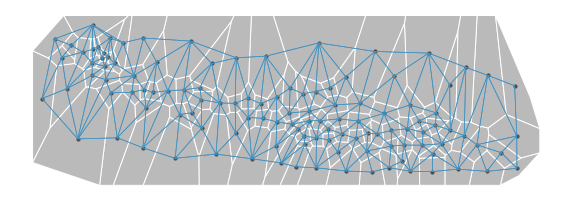

In [11]:
# Plot spatial connectivity structure
plot_spatial_weights(W4plot, gdf);

In [16]:
# What are the neighbors of ....?
W['3510']

{'3509': 1.0, '3512': 1.0, '3511': 1.0}

In [20]:
self_and_neighbors = ['3510']
self_and_neighbors.extend(W.neighbors['3510'])
neighborsOnly = W.neighbors['3510']

In [21]:
gdf.query('districtID in @neighborsOnly')

,districtID,district,ln_NTLpw2013,ln_NTLpw2020,ln_invSh2013,ln_invSh2020,ln_tert2013,ln_tert2020,ln_ngr2013,ln_ngr2020,geometry
13,3511,Kabupaten Bondowoso,-5.113225,-4.757772,-1.392902,-1.410397,-3.104083,-2.741161,-0.021977,0.011069,"POLYGON ((113.63245 -7.92032, 113.66789 -7.632..."
26,3509,Kabupaten Jember,-4.784177,-4.321345,-1.694495,-1.681410,-3.526158,-2.790289,0.035569,0.037019,"POLYGON ((113.32136 -8.53786, 113.40958 -8.123..."
99,3512,Kabupaten Situbondo,-5.204681,-4.350536,-1.429879,-1.442361,-3.212542,-2.462608,0.009368,0.032932,"POLYGON ((113.65803 -7.52217, 113.98267 -7.280..."


In [22]:
gdf.query('districtID in @self_and_neighbors')

,districtID,district,ln_NTLpw2013,ln_NTLpw2020,ln_invSh2013,ln_invSh2020,ln_tert2013,ln_tert2020,ln_ngr2013,ln_ngr2020,geometry
6,3510,Kabupaten Banyuwangi,-5.160392,-3.488024,-1.226302,-1.159266,-3.694433,-2.571728,0.009789,0.017922,"POLYGON ((113.87523 -8.53786, 113.94654 -8.234..."
13,3511,Kabupaten Bondowoso,-5.113225,-4.757772,-1.392902,-1.410397,-3.104083,-2.741161,-0.021977,0.011069,"POLYGON ((113.63245 -7.92032, 113.66789 -7.632..."
26,3509,Kabupaten Jember,-4.784177,-4.321345,-1.694495,-1.681410,-3.526158,-2.790289,0.035569,0.037019,"POLYGON ((113.32136 -8.53786, 113.40958 -8.123..."
99,3512,Kabupaten Situbondo,-5.204681,-4.350536,-1.429879,-1.442361,-3.212542,-2.462608,0.009368,0.032932,"POLYGON ((113.65803 -7.52217, 113.98267 -7.280..."


In [23]:
# Combine ID coulmn with spatial connectivity matrix
df_ids_AND_Wmatrix = pd.merge(df_ids, df_Wmatrix, left_index=True, right_index=True)
df_ids_AND_Wmatrix

,districtID,0,1,2,3,4,5,6,7,8,...,108,109,110,111,112,113,114,115,116,117
0,3101,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,3171,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3172,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3173,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3174,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,3604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
114,3671,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
115,3672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
116,3673,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [24]:
# Export spatial connectivity matrix to CSV and Stata
df_ids_AND_Wmatrix.to_csv('WtpQueenWithIds.csv')
df_Wmatrix.to_csv('WtpQueen.csv', index = False)
df_Wmatrix.to_stata('WtpQueen.dta', write_index = False)

In [32]:
# Compute spatial lags
W = weights.Queen.from_dataframe(gdf)
W.transform = 'r'

gdf['Wln_NTLpw2013'] = weights.lag_spatial(W, gdf['ln_NTLpw2013'])
gdf['Wln_NTLpw2020'] = weights.lag_spatial(W, gdf['ln_NTLpw2020'])
gdf['Wln_invSh2013'] = weights.lag_spatial(W, gdf['ln_invSh2013'])
gdf['Wln_invSh2020'] = weights.lag_spatial(W, gdf['ln_invSh2020'])
gdf['Wln_tert2013']  = weights.lag_spatial(W, gdf['ln_tert2013'])
gdf['Wln_tert2020']  = weights.lag_spatial(W, gdf['ln_tert2020'])
gdf['Wln_ngr2013']   = weights.lag_spatial(W, gdf['ln_ngr2013'])
gdf['Wln_ngr2020']   = weights.lag_spatial(W, gdf['ln_ngr2020'])

In [33]:
gdf

,districtID,district,ln_NTLpw2013,ln_NTLpw2020,ln_invSh2013,ln_invSh2020,ln_tert2013,ln_tert2020,ln_ngr2013,ln_ngr2020,geometry,Wln_NTLpw2013,Wln_NTLpw2020,Wln_invSh2013,Wln_invSh2020,Wln_tert2013,Wln_tert2020,Wln_ngr2013,Wln_ngr2020
0,3204,Kabupaten Bandung,-5.280244,-4.764143,-1.589718,-1.650874,-3.228224,-4.746386,0.045233,-0.037295,"POLYGON ((107.38392 -7.11366, 107.48321 -7.020...",-5.237773,-4.938620,-1.299198,-1.367284,-2.725992,-3.072033,0.013828,0.035869
1,3217,Kabupaten Bandung Barat,-4.957213,-4.674590,-1.571337,-1.513391,-2.579793,-2.700892,0.020760,-0.018101,"POLYGON ((107.15082 -6.72829, 107.47434 -6.745...",-5.146880,-4.815308,-1.452085,-1.507760,-2.879294,-3.654699,0.029580,-0.016680
2,3526,Kabupaten Bangkalan,-4.896193,-3.955309,-1.448144,-1.227849,-3.539545,-2.864680,0.042442,0.027172,"POLYGON ((112.71909 -7.06316, 113.12231 -5.799...",-4.723721,-3.891382,-1.435406,-1.400062,-2.477468,-2.025451,0.045464,0.025863
3,3304,Kabupaten Banjarnegara,-6.552655,-5.412324,-1.544315,-1.574133,-3.181478,-2.659973,-0.046095,0.012081,"POLYGON ((109.51527 -7.48720, 109.54580 -7.215...",-6.291026,-5.125032,-1.651113,-1.571650,-3.425536,-2.721407,-0.012396,0.029369
4,3402,Kabupaten Bantul,-5.299704,-4.360671,-1.494107,-1.598280,-2.251181,-1.683325,-0.035697,-0.032963,"POLYGON ((109.96211 -8.53786, 110.27234 -7.833...",-5.758880,-3.521692,-1.376286,-1.302215,-2.465090,-1.771242,0.011026,-1.058238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,3504,Kabupaten Tulungagung,-5.511849,-4.684604,-1.309050,-1.297500,-3.160292,-2.346782,0.010749,0.060023,"POLYGON ((111.72442 -7.95721, 111.75886 -7.883...",-5.652388,-4.718260,-1.496045,-1.522017,-2.652170,-2.137143,0.009098,0.021484
114,3312,Kabupaten Wonogiri,-6.628832,-4.753109,-1.546215,-1.635168,-3.420922,-2.610350,0.011574,0.078129,"POLYGON ((110.79204 -7.88623, 110.96922 -7.764...",-5.764823,-4.285355,-1.368272,-1.387051,-2.611666,-2.281034,0.016758,-0.358526
115,3307,Kabupaten Wonosobo,-6.414873,-5.348095,-1.701147,-1.728278,-3.679352,-2.852210,-0.066648,0.006124,"POLYGON ((109.74749 -7.51757, 109.82324 -7.225...",-6.164909,-5.110004,-1.477185,-1.429724,-3.047449,-2.489760,0.008284,-0.008047
116,3374,Kota Semarang,-4.725831,-4.148100,-0.383323,-0.513152,-2.036142,-1.301588,0.060895,0.077626,"POLYGON ((110.24203 -6.51856, 110.33946 -6.595...",-5.628861,-4.666852,-1.378092,-1.291960,-3.140121,-2.612263,0.025908,-0.010223


In [34]:
# Drop the geometry column
df = gdf.drop(columns='geometry')
df

,districtID,district,ln_NTLpw2013,ln_NTLpw2020,ln_invSh2013,ln_invSh2020,ln_tert2013,ln_tert2020,ln_ngr2013,ln_ngr2020,Wln_NTLpw2013,Wln_NTLpw2020,Wln_invSh2013,Wln_invSh2020,Wln_tert2013,Wln_tert2020,Wln_ngr2013,Wln_ngr2020
0,3204,Kabupaten Bandung,-5.280244,-4.764143,-1.589718,-1.650874,-3.228224,-4.746386,0.045233,-0.037295,-5.237773,-4.938620,-1.299198,-1.367284,-2.725992,-3.072033,0.013828,0.035869
1,3217,Kabupaten Bandung Barat,-4.957213,-4.674590,-1.571337,-1.513391,-2.579793,-2.700892,0.020760,-0.018101,-5.146880,-4.815308,-1.452085,-1.507760,-2.879294,-3.654699,0.029580,-0.016680
2,3526,Kabupaten Bangkalan,-4.896193,-3.955309,-1.448144,-1.227849,-3.539545,-2.864680,0.042442,0.027172,-4.723721,-3.891382,-1.435406,-1.400062,-2.477468,-2.025451,0.045464,0.025863
3,3304,Kabupaten Banjarnegara,-6.552655,-5.412324,-1.544315,-1.574133,-3.181478,-2.659973,-0.046095,0.012081,-6.291026,-5.125032,-1.651113,-1.571650,-3.425536,-2.721407,-0.012396,0.029369
4,3402,Kabupaten Bantul,-5.299704,-4.360671,-1.494107,-1.598280,-2.251181,-1.683325,-0.035697,-0.032963,-5.758880,-3.521692,-1.376286,-1.302215,-2.465090,-1.771242,0.011026,-1.058238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,3504,Kabupaten Tulungagung,-5.511849,-4.684604,-1.309050,-1.297500,-3.160292,-2.346782,0.010749,0.060023,-5.652388,-4.718260,-1.496045,-1.522017,-2.652170,-2.137143,0.009098,0.021484
114,3312,Kabupaten Wonogiri,-6.628832,-4.753109,-1.546215,-1.635168,-3.420922,-2.610350,0.011574,0.078129,-5.764823,-4.285355,-1.368272,-1.387051,-2.611666,-2.281034,0.016758,-0.358526
115,3307,Kabupaten Wonosobo,-6.414873,-5.348095,-1.701147,-1.728278,-3.679352,-2.852210,-0.066648,0.006124,-6.164909,-5.110004,-1.477185,-1.429724,-3.047449,-2.489760,0.008284,-0.008047
116,3374,Kota Semarang,-4.725831,-4.148100,-0.383323,-0.513152,-2.036142,-1.301588,0.060895,0.077626,-5.628861,-4.666852,-1.378092,-1.291960,-3.140121,-2.612263,0.025908,-0.010223


In [36]:
# Export dataset to Stata
df.to_stata('data_wide.dta', write_index = False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ab2f2ca-16ce-4758-a863-29fc47eb2bb0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>